# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df_raw = pd.read_csv("./Dataset_inisiasi.csv")
df_raw.head(5)

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
print('Kolom: {}'.format(df_raw.shape[1]))
print('Baris: {}'.format(df_raw.shape[0]))

Kolom: 23
Baris: 5000


**Temuan:**<br>
Banyaknya kolom pada dataset menunjukkan bahwa data memiliki dimensi yang tinggi. Kondisi ini dapat memengaruhi akurasi evaluasi clustering, khususnya pada metrik silhouette score, karena efek dari *sparsity* dan *curse of dimensionality*. Oleh karena itu, diperlukan teknik reduksi dimensi seperti PCA untuk meningkatkan kualitas evaluasi dan visualisasi.

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [5]:
df_raw.isna().sum()

Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

**Temuan:**<br>
Dataset ini memiliki nilai yang *missing values* pada kolom `Attendance (%)`, `Assignments_Avg`, dan `Parent_Education_Level`, masing-masing sebanyak 516, 517, dan 1.794 dari total 5.000 entri data.

In [6]:
df_raw.describe(include=['O'])

,Student_ID,First_Name,Last_Name,Email,Gender,Department,Grade,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,3206,5000
unique,5000,8,6,5000,2,4,5,2,2,4,3
top,S1000,Maria,Johnson,student0@university.com,Male,CS,A,No,Yes,PhD,Low
freq,1,657,868,1,2551,2022,1495,3493,4485,820,1983


**Temuan:**<br>
* Kolom `Student_ID`, `First_Name`, dan `Last_Name` merupakan kolom identifikasi yang mana tidak akan digunakan dalam machine learning, maka dapat di-drop
* Kolom `Gender`, `Department`, `Extracurricular_Activities`, dan `Internet_Access_at_Home` bukan merupakan kategorikal ordinal maka dari itu dilakukan *One-Hot Encoding*
* Kolom `Grade`, `Parent_Education_Level`, dan `Family_Income_Level` merupakan kategorikal ordinal maka dari itu dilakukan *Ordinal Encoding*

In [7]:
df_raw.describe(include=['float64'])

,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Sleep_Hours_per_Night
count,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,6.488140
std,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,1.452283
min,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,4.000000
25%,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,5.200000
50%,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,6.500000
75%,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,7.700000
max,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,9.000000


**Temuan:**<br>
Melihat nilai rata-rata antar kolom memiliki nilai rentang yang jauh seperti `Attendance (%)` dengan `Participation_Score`, selisihnya kurang lebih 69. Rentang nilai yang jauh ini berpotensi mengurangi keakuratan model terutama model yang sesitif terhadap sekala seperti K-Means. Hal ini dapat divisualisasikan dengan grafik *kernel density estimation*.

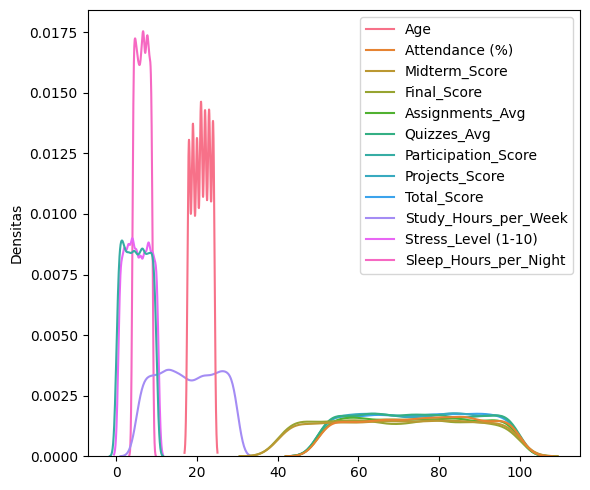

In [8]:
fig, ax = plt.subplots(1,figsize=(6,5))
sns.kdeplot(ax=ax, data=df_raw)

ax.set_ylabel('Densitas')

fig.tight_layout()
plt.show()

**Temuan:**<br>
Berdasarkan seluruh grafik *kernel density estimation* bahwa skala antar fitur sangat bervariasi, maka dari itu standarisasi diperlukan.

In [9]:
def outliers(df):
  iqr = df.quantile(0.75) - df.quantile(0.25)
  return pd.DataFrame(df[((df<(df.quantile(0.25)-1.5*iqr)) | (df>(df.quantile(0.75)+1.5*iqr)))])

In [10]:
outliers(df_raw.select_dtypes(include=['float64'])).count()

Attendance (%)           0
Midterm_Score            0
Final_Score              0
Assignments_Avg          0
Quizzes_Avg              0
Participation_Score      0
Projects_Score           0
Total_Score              0
Study_Hours_per_Week     0
Sleep_Hours_per_Night    0
dtype: int64

/tmp/ipykernel_7571/3298605547.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_raw.select_dtypes(include=['float64']).columns,rotation=45,rotation_mode='anchor', ha='right',va='center')


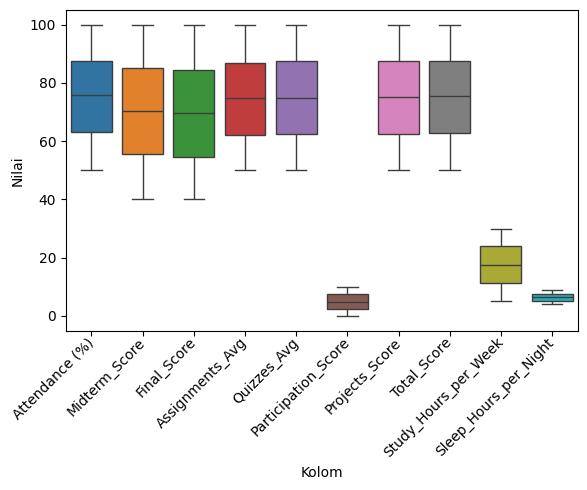

In [11]:
fig, ax = plt.subplots(1,figsize=(6,5))
sns.boxplot(ax=ax, data=df_raw.select_dtypes(include=['float64']))

ax.set_ylabel('Nilai')
ax.set_xlabel('Kolom')
ax.set_xticklabels(df_raw.select_dtypes(include=['float64']).columns,rotation=45,rotation_mode='anchor', ha='right',va='center')

fig.tight_layout()
plt.show()

**Temuan:**<br>
Tidak ditemukan outlier, maka tidak diperlukan penanganan terhadap data outlier.

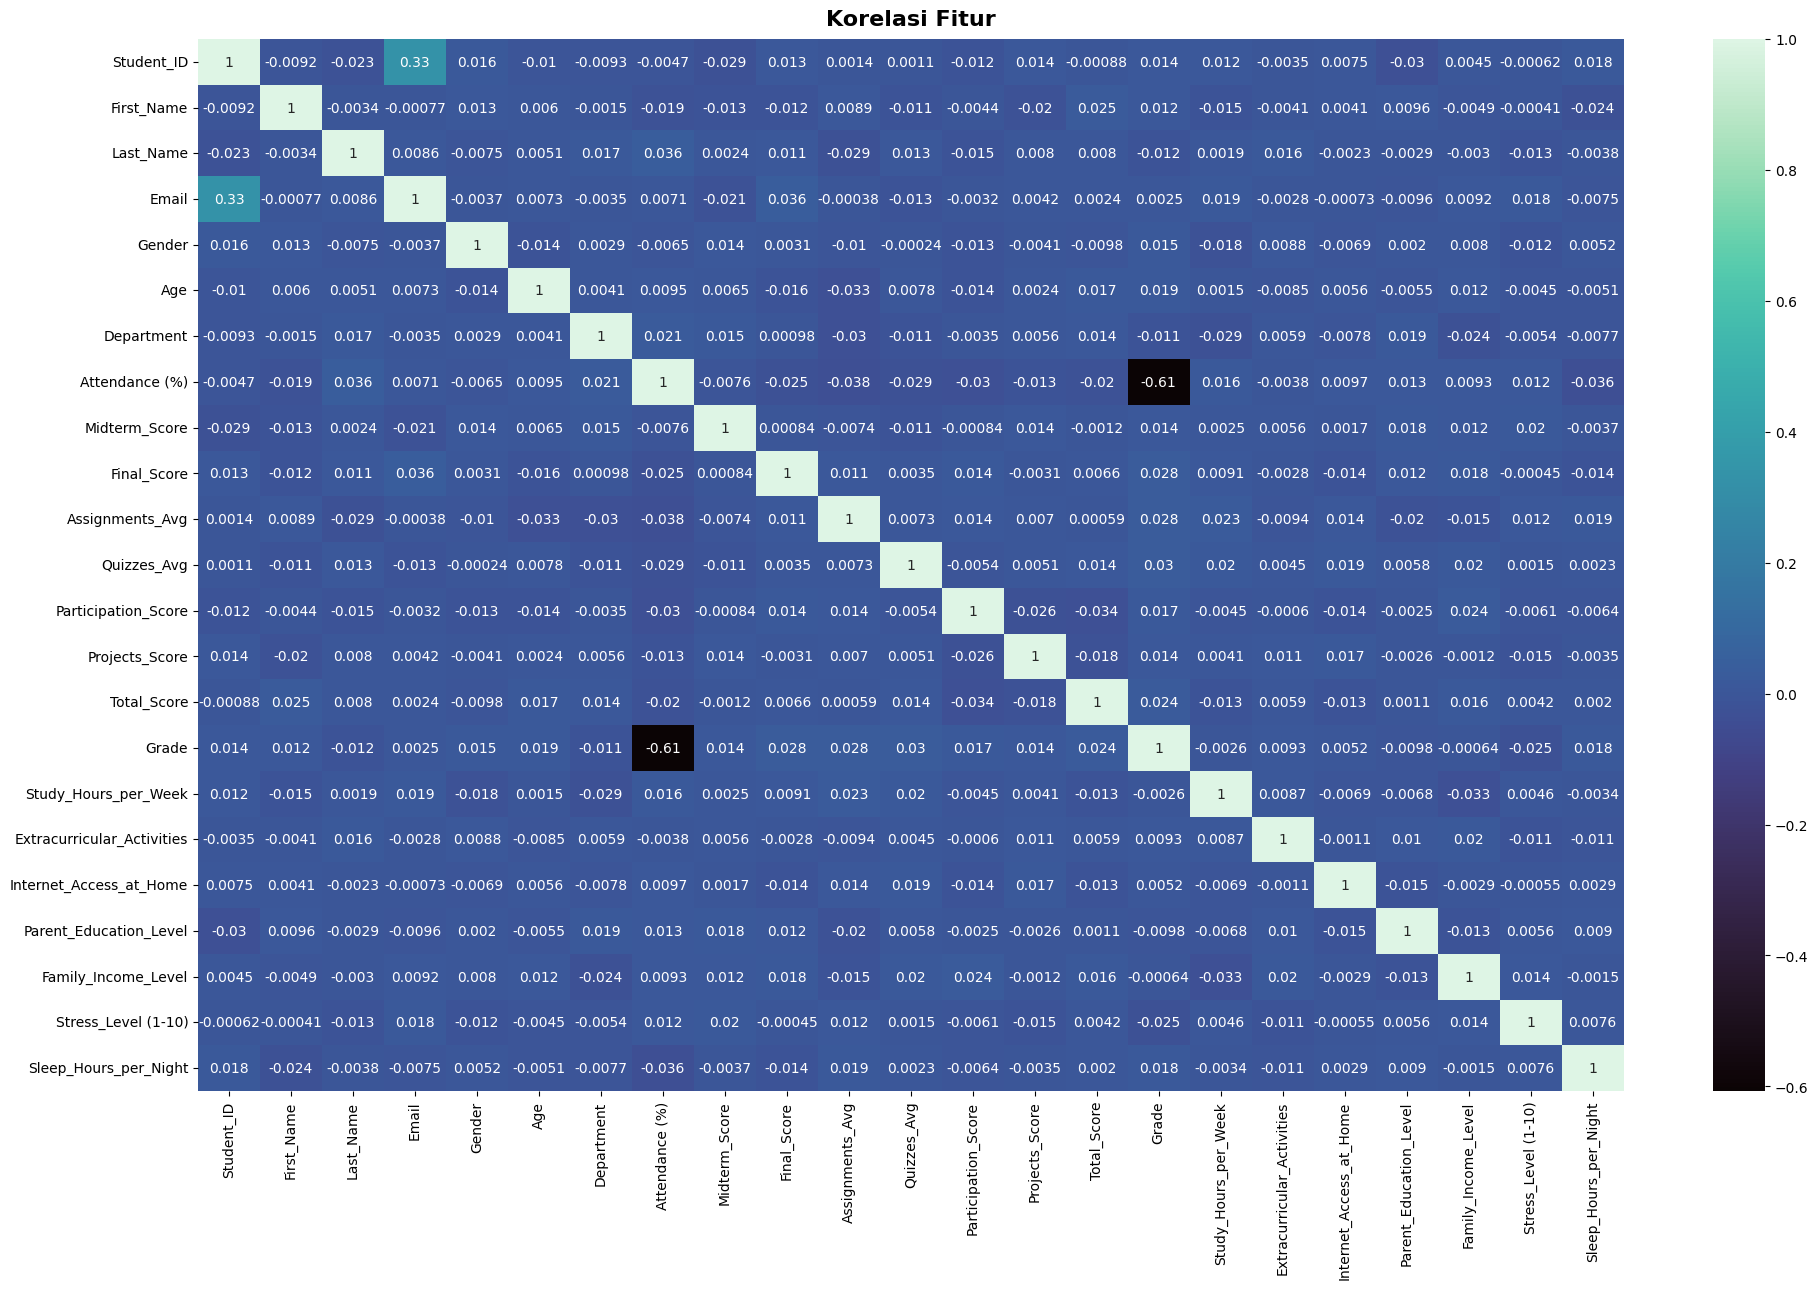

In [12]:
df_encoded = df_raw.copy()

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

fig, ax = plt.subplots(1, 1, figsize=(20, 13))
corr = df_encoded.corr()
sns.heatmap(ax=ax, data=corr, annot=True, cmap='mako')

ax.set_title('Korelasi Fitur', pad=10, fontsize=16, fontweight='semibold')
fig.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [13]:
df_preprocessed = df_raw.copy()

In [14]:
df_preprocessed['Attendance (%)'] = df_preprocessed['Attendance (%)'].fillna(df_preprocessed['Attendance (%)'].mean())
df_preprocessed['Assignments_Avg'] = df_preprocessed['Assignments_Avg'].fillna(df_preprocessed['Assignments_Avg'].mean())
df_preprocessed['Parent_Education_Level'] = df_preprocessed['Parent_Education_Level'].fillna(df_preprocessed['Parent_Education_Level'].mode()[0])

df_preprocessed.isna().sum()

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [15]:
df_preprocessed.drop(['Student_ID', 'First_Name', 'Last_Name', 'Email'], axis=1, inplace=True)

df_preprocessed.columns

Index(['Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score',
       'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [16]:
encoder = OneHotEncoder(drop=None, sparse_output=False, dtype=int)

encoded_array = encoder.fit_transform(df_preprocessed[['Gender', 'Department', 'Extracurricular_Activities', 'Internet_Access_at_Home']])

df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Gender', 'Department', 'Extracurricular_Activities', 'Internet_Access_at_Home']), index=df_preprocessed.index)

df_preprocessed = df_preprocessed.drop(columns=['Gender', 'Department', 'Extracurricular_Activities', 'Internet_Access_at_Home'])
df_preprocessed = pd.concat([df_preprocessed, df_encoded], axis=1)

df_preprocessed.head(3)

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,...,Gender_Female,Gender_Male,Department_Business,Department_CS,Department_Engineering,Department_Mathematics,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_at_Home_No,Internet_Access_at_Home_Yes
0,22,52.29,55.03,57.82,84.220000,74.06,3.99,85.90,56.09,F,...,1,0,0,0,1,0,1,0,0,1
1,18,97.27,97.23,45.80,74.798673,94.24,8.32,55.65,50.64,A,...,0,1,0,0,1,0,1,0,0,1
2,24,57.19,67.05,93.68,67.700000,85.70,5.05,73.79,70.30,D,...,0,1,1,0,0,0,1,0,0,1


In [17]:
df_preprocessed.columns

Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night', 'Gender_Female', 'Gender_Male',
       'Department_Business', 'Department_CS', 'Department_Engineering',
       'Department_Mathematics', 'Extracurricular_Activities_No',
       'Extracurricular_Activities_Yes', 'Internet_Access_at_Home_No',
       'Internet_Access_at_Home_Yes'],
      dtype='object')

In [18]:
print(df_preprocessed['Grade'].unique())
print(df_preprocessed['Parent_Education_Level'].unique())
print(df_preprocessed['Family_Income_Level'].unique())

['F' 'A' 'D' 'B' 'C']
['High School' 'PhD' "Master's" "Bachelor's"]
['Medium' 'Low' 'High']


In [19]:
grade_order = ['F', 'E', 'D', 'C', 'B', 'A']
parent_edu_order = ["High School", "Bachelor's", "Master's", "PhD"]
income_order = ['Low', 'Medium', 'High']

In [20]:
df_preprocessed['Grade'] = pd.Categorical(df_preprocessed['Grade'], categories=grade_order, ordered=True).codes
df_preprocessed['Parent_Education_Level'] = pd.Categorical(df_preprocessed['Parent_Education_Level'], categories=parent_edu_order, ordered=True).codes
df_preprocessed['Family_Income_Level'] = pd.Categorical(df_preprocessed['Family_Income_Level'], categories=income_order, ordered=True).codes

df_preprocessed.head(3)

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,...,Gender_Female,Gender_Male,Department_Business,Department_CS,Department_Engineering,Department_Mathematics,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_at_Home_No,Internet_Access_at_Home_Yes
0,22,52.29,55.03,57.82,84.220000,74.06,3.99,85.90,56.09,0,...,1,0,0,0,1,0,1,0,0,1
1,18,97.27,97.23,45.80,74.798673,94.24,8.32,55.65,50.64,5,...,0,1,0,0,1,0,1,0,0,1
2,24,57.19,67.05,93.68,67.700000,85.70,5.05,73.79,70.30,2,...,0,1,1,0,0,0,1,0,0,1


In [21]:
df_preprocessed.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,...,Gender_Female,Gender_Male,Department_Business,Department_CS,Department_Engineering,Department_Mathematics,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_at_Home_No,Internet_Access_at_Home_Yes
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,3.109400,...,0.489800,0.510200,0.201200,0.404400,0.293800,0.100600,0.698600,0.301400,0.103000,0.897000
std,1.989786,13.610481,17.213209,17.238744,13.646226,14.504281,2.890136,14.423415,14.399941,1.754208,...,0.499946,0.499946,0.400937,0.490825,0.455547,0.300828,0.458912,0.458912,0.303989,0.303989
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,64.737500,55.457500,54.667500,63.687500,62.490000,2.440000,62.320000,62.835000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,21.000000,75.431409,70.510000,69.735000,74.798673,74.695000,4.955000,74.980000,75.395000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,23.000000,86.182500,84.970000,84.500000,85.570000,87.630000,7.500000,87.367500,87.652500,5.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_preprocessed)
df_preprocessed = pd.DataFrame(df_normalized, index = df_preprocessed.index, columns = df_preprocessed.columns)

df_preprocessed.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,...,Gender_Female,Gender_Male,Department_Business,Department_CS,Department_Engineering,Department_Mathematics,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_at_Home_No,Internet_Access_at_Home_Yes
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,...,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,-4.121148e-16,1.094236e-16,3.439027e-16,7.872814e-16,7.162271e-16,-4.106937e-16,-8.597567e-17,1.307399e-15,1.811884e-16,6.536993e-17,...,1.989520e-17,-1.989520e-17,9.947598e-18,7.460699e-17,-4.121148e-17,-2.131628e-17,-4.192202e-17,4.192202e-17,1.207923e-17,-3.126388e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,...,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.532177e+00,-1.867969e+00,-1.762012e+00,-1.719600e+00,-1.817437e+00,-1.715577e+00,-1.723283e+00,-1.727563e+00,-1.743362e+00,-1.772715e+00,...,-9.798039e-01,-1.020612e+00,-5.018743e-01,-8.240019e-01,-6.450035e-01,-3.344433e-01,-1.522449e+00,-6.568366e-01,-3.388616e-01,-2.951057e+00
25%,-1.029560e+00,-7.857899e-01,-8.639198e-01,-8.686703e-01,-8.143119e-01,-8.564348e-01,-8.789476e-01,-8.740039e-01,-8.533391e-01,-6.324853e-01,...,-9.798039e-01,-1.020612e+00,-5.018743e-01,-8.240019e-01,-6.450035e-01,-3.344433e-01,-1.522449e+00,-6.568366e-01,-3.388616e-01,3.388616e-01
50%,-2.432665e-02,0.000000e+00,1.064150e-02,5.465678e-03,1.041480e-15,-1.487489e-02,-8.659282e-03,3.823333e-03,1.897392e-02,-6.237055e-02,...,-9.798039e-01,9.798039e-01,-5.018743e-01,-8.240019e-01,-6.450035e-01,-3.344433e-01,6.568366e-01,-6.568366e-01,-3.388616e-01,3.388616e-01
75%,9.809070e-01,7.899916e-01,8.507781e-01,8.620522e-01,7.894054e-01,8.770200e-01,8.720102e-01,8.627558e-01,8.702778e-01,1.077859e+00,...,1.020612e+00,9.798039e-01,-5.018743e-01,1.213589e+00,1.550379e+00,-3.344433e-01,6.568366e-01,1.522449e+00,-3.388616e-01,3.388616e-01
max,1.483524e+00,1.805303e+00,1.722870e+00,1.760119e+00,1.845481e+00,1.727199e+00,1.737108e+00,1.738676e+00,1.727138e+00,1.077859e+00,...,1.020612e+00,9.798039e-01,1.992531e+00,1.213589e+00,1.550379e+00,2.990043e+00,6.568366e-01,1.522449e+00,2.951057e+00,3.388616e-01


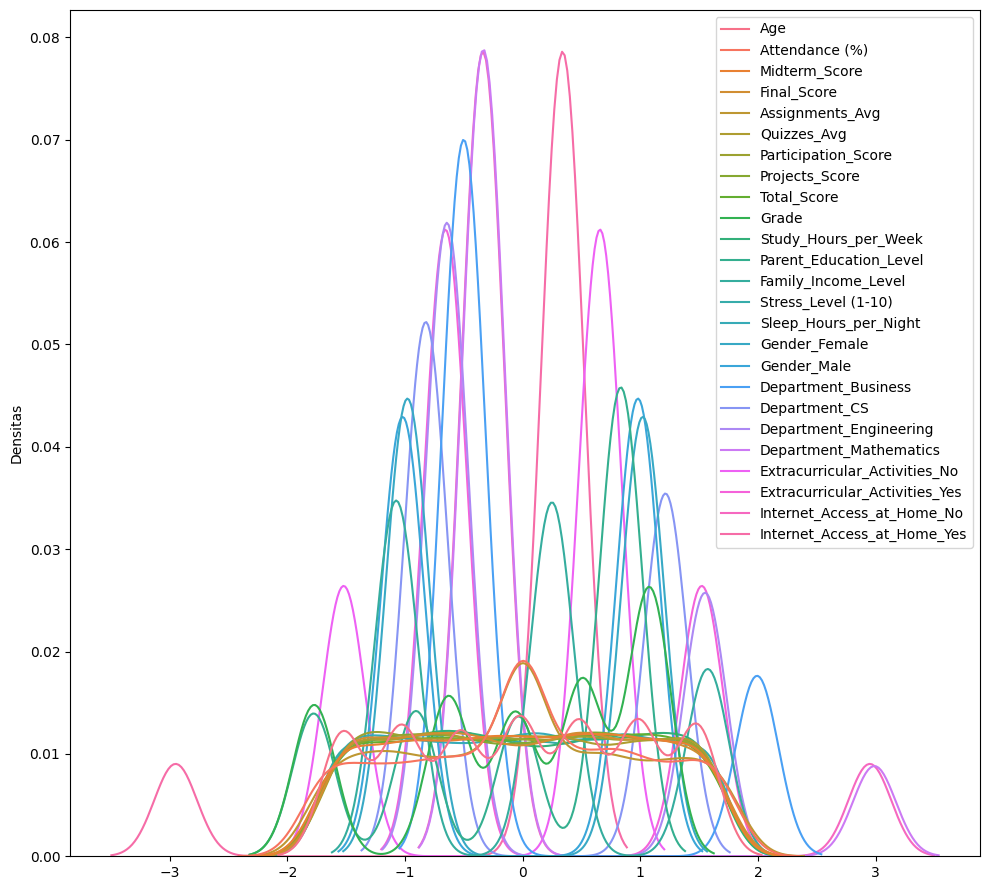

In [23]:
fig, ax = plt.subplots(1,figsize=(10,9))
sns.kdeplot(ax=ax, data=df_preprocessed)

ax.set_ylabel('Densitas')

fig.tight_layout()
plt.show()

In [24]:
df_preprocessed_pca = PCA(n_components=2).fit_transform(df_preprocessed)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [25]:
RANDOM_STATE = 0

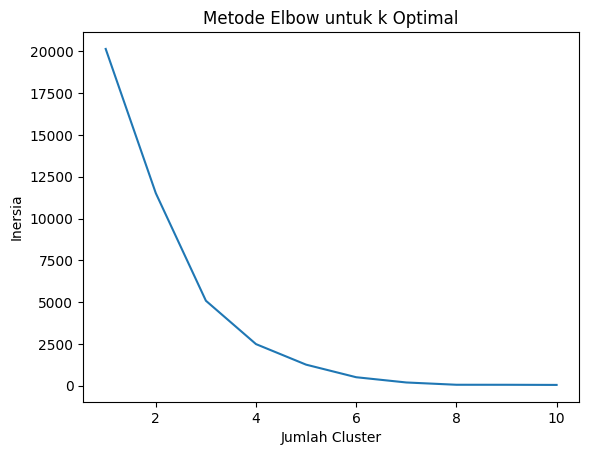

In [26]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans.fit(df_preprocessed_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title("Metode Elbow untuk k Optimal")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inersia")
plt.show()

In [27]:
kmeans = KMeans(n_clusters=4, random_state=RANDOM_STATE)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [28]:
sil_score = silhouette_score(df_preprocessed_pca, kmeans.fit_predict(df_preprocessed_pca))
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.7620539014667058


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [29]:
df_feat = df_preprocessed.copy()

### Feature Selection

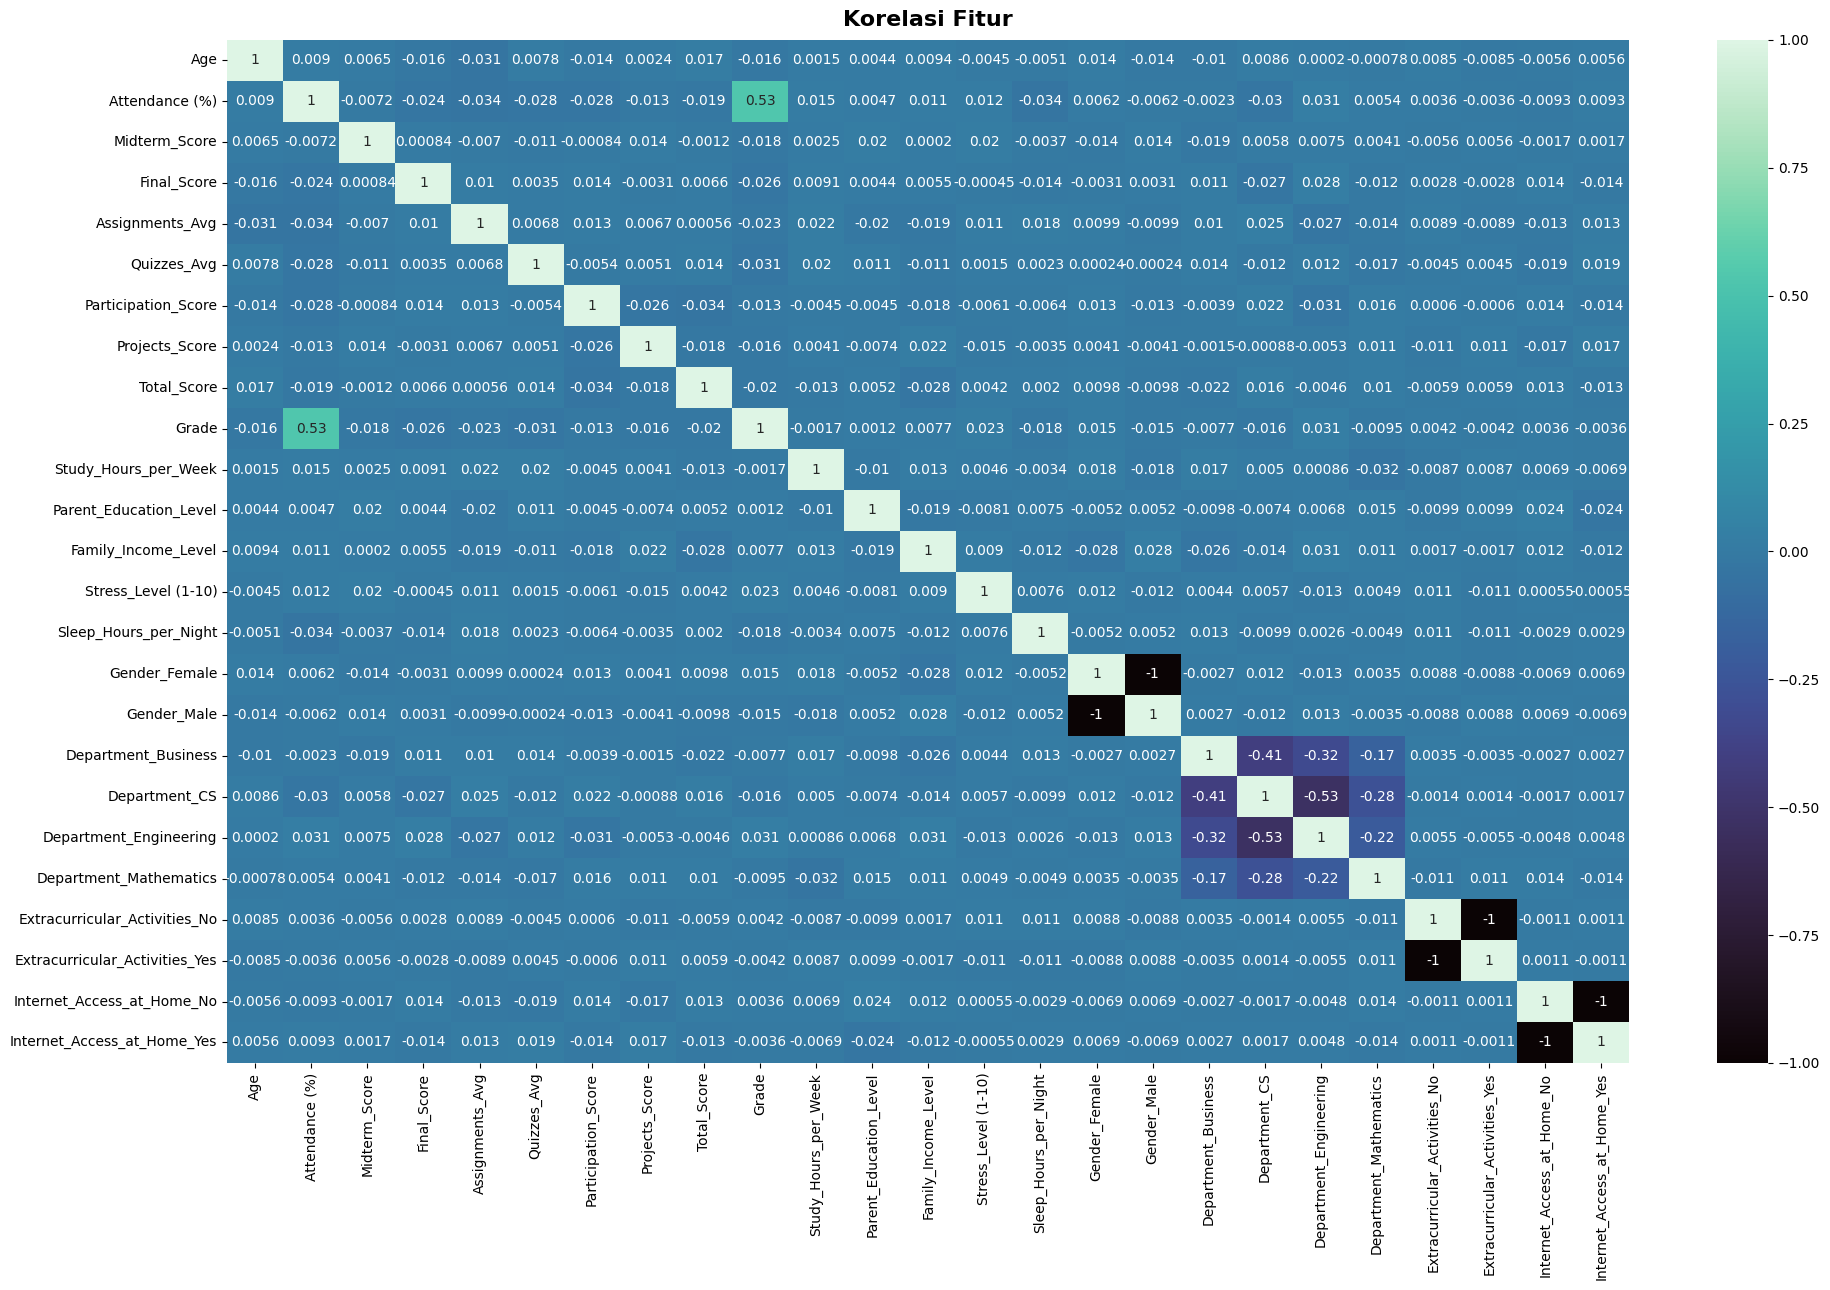

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(20, 13))
corr = df_feat.corr()
sns.heatmap(ax=ax, data=corr, annot=True, cmap='mako')

ax.set_title('Korelasi Fitur', pad=10, fontsize=16, fontweight='semibold')
fig.tight_layout()
plt.show()

**Penjelasan:**<br>
Pada tahap `feature selection` ini, dilakukan proses filtrasi dengan menghapus fitur-fitur yang memiliki korelasi rendah terhadap fitur target, yaitu `Grade` atau `Total_Score`. Selain itu, karena fokus analisis berada pada `Grade` atau `Total_Score`, maka fitur-fitur yang secara langsung merepresentasikan komponen penilaian seperti `Midterm_Score`, `Final_Score`, dan sejenisnya, turut dihapus untuk menghindari redundansi informasi.

In [31]:
df_feat.columns

Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night', 'Gender_Female', 'Gender_Male',
       'Department_Business', 'Department_CS', 'Department_Engineering',
       'Department_Mathematics', 'Extracurricular_Activities_No',
       'Extracurricular_Activities_Yes', 'Internet_Access_at_Home_No',
       'Internet_Access_at_Home_Yes'],
      dtype='object')

In [32]:
dropped_columns = ['Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
                   'Projects_Score', 'Age','Parent_Education_Level', 'Extracurricular_Activities_No', 'Extracurricular_Activities_Yes']

In [33]:
df_feat_selected = df_feat.drop(dropped_columns, axis=1)

In [34]:
df_feat_selected_pca = PCA(n_components=2).fit_transform(df_feat_selected)

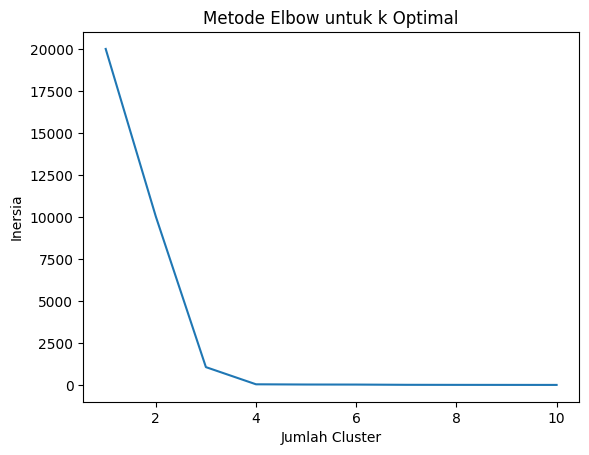

In [35]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans.fit(df_feat_selected_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title("Metode Elbow untuk k Optimal")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inersia")
plt.show()

In [36]:
kmeans = KMeans(n_clusters=4, random_state=RANDOM_STATE)
sil_score = silhouette_score(df_feat_selected_pca, kmeans.fit_predict(df_feat_selected_pca))
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.9545043491285762


**Silhouette Score**<br>

| Sebelum Feature Selection| Setelah Feature Selection|
|---------------|---------------|
| 0.7608660124658387| 0.9545043491285758|

Silhouette score meningkat sebesar 0.1936 atau 25.45%

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

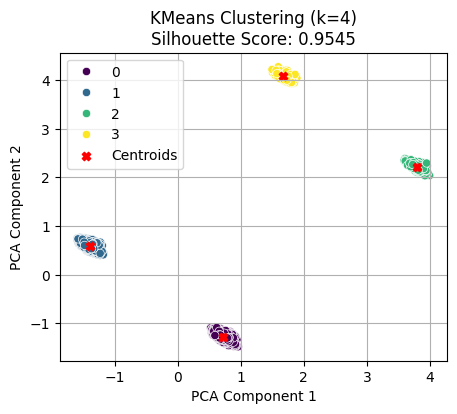

In [37]:
kmeans = KMeans(n_clusters=4, random_state=RANDOM_STATE)
labels = kmeans.fit_predict(df_feat_selected_pca)

plt.figure(figsize=(5, 4))
sns.scatterplot(
    x=df_feat_selected_pca[:, 0],
    y=df_feat_selected_pca[:, 1],
    hue=labels,
    palette='viridis',
)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', label='Centroids')

plt.title(f'KMeans Clustering (k=4)\nSilhouette Score: {sil_score:.4f}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [38]:
df_finalized = df_raw.copy()

In [39]:
dropped_columns = ['Student_ID', 'First_Name', 'Last_Name', 'Email',
                   'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
                   'Projects_Score', 'Age','Parent_Education_Level', 'Extracurricular_Activities']

In [40]:
df_finalized.drop(dropped_columns, axis=1, inplace=True)

In [41]:
df_finalized['Cluster'] = kmeans.labels_

In [42]:
df_finalized.head(5)

,Gender,Department,Attendance (%),Total_Score,Grade,Study_Hours_per_Week,Internet_Access_at_Home,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Cluster
0,Female,Engineering,52.29,56.09,F,6.2,Yes,Medium,5,4.7,1
1,Male,Engineering,97.27,50.64,A,19.0,Yes,Medium,4,9.0,0
2,Male,Business,57.19,70.30,D,20.7,Yes,Low,6,6.2,0
3,Female,Mathematics,95.15,61.63,A,24.8,Yes,High,3,6.7,1
4,Female,CS,54.18,66.13,F,15.4,Yes,High,2,7.1,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [43]:
df_finalized["Stress_Level (1-10)"] = df_finalized["Stress_Level (1-10)"].astype("category")
df_finalized["Cluster"] = df_finalized["Cluster"].astype("category")

In [44]:
df_finalized.head(5)

,Gender,Department,Attendance (%),Total_Score,Grade,Study_Hours_per_Week,Internet_Access_at_Home,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Cluster
0,Female,Engineering,52.29,56.09,F,6.2,Yes,Medium,5,4.7,1
1,Male,Engineering,97.27,50.64,A,19.0,Yes,Medium,4,9.0,0
2,Male,Business,57.19,70.30,D,20.7,Yes,Low,6,6.2,0
3,Female,Mathematics,95.15,61.63,A,24.8,Yes,High,3,6.7,1
4,Female,CS,54.18,66.13,F,15.4,Yes,High,2,7.1,1


In [45]:
df_finalized.describe(include=['O'])

,Gender,Department,Grade,Internet_Access_at_Home,Family_Income_Level
count,5000,5000,5000,5000,5000
unique,2,4,5,2,3
top,Male,CS,A,Yes,Low
freq,2551,2022,1495,4485,1983


In [46]:
df_finalized.describe(include='all')

,Gender,Department,Attendance (%),Total_Score,Grade,Study_Hours_per_Week,Internet_Access_at_Home,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Cluster
count,5000,5000,4484.000000,5000.000000,5000,5000.000000,5000,5000,5000.0,5000.000000,5000.0
unique,2,4,NaN,NaN,5,NaN,2,3,10.0,NaN,4.0
top,Male,CS,NaN,NaN,A,NaN,Yes,Low,4.0,NaN,0.0
freq,2551,2022,NaN,NaN,1495,NaN,4485,1983,533.0,NaN,2283.0
mean,NaN,NaN,75.431409,75.121804,NaN,17.658860,NaN,NaN,NaN,6.488140,NaN
std,NaN,NaN,14.372446,14.399941,NaN,7.275864,NaN,NaN,NaN,1.452283,NaN
min,NaN,NaN,50.010000,50.020000,NaN,5.000000,NaN,NaN,NaN,4.000000,NaN
25%,NaN,NaN,63.265000,62.835000,NaN,11.400000,NaN,NaN,NaN,5.200000,NaN
50%,NaN,NaN,75.725000,75.395000,NaN,17.500000,NaN,NaN,NaN,6.500000,NaN
75%,NaN,NaN,87.472500,87.652500,NaN,24.100000,NaN,NaN,NaN,7.700000,NaN


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [47]:
df_finalized[df_finalized["Cluster"]==0].describe(include='all')

,Gender,Department,Attendance (%),Total_Score,Grade,Study_Hours_per_Week,Internet_Access_at_Home,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Cluster
count,2283,2283,2042.000000,2283.000000,2283,2283.000000,2283,2283,2283.0,2283.000000,2283.0
unique,1,4,NaN,NaN,5,NaN,1,3,10.0,NaN,1.0
top,Male,CS,NaN,NaN,A,NaN,Yes,Medium,4.0,NaN,0.0
freq,2283,901,NaN,NaN,672,NaN,2283,933,250.0,NaN,2283.0
mean,NaN,NaN,75.461895,74.978914,NaN,17.500350,NaN,NaN,NaN,6.507534,NaN
std,NaN,NaN,14.509181,14.426377,NaN,7.247982,NaN,NaN,NaN,1.458877,NaN
min,NaN,NaN,50.010000,50.070000,NaN,5.000000,NaN,NaN,NaN,4.000000,NaN
25%,NaN,NaN,62.975000,62.620000,NaN,11.350000,NaN,NaN,NaN,5.200000,NaN
50%,NaN,NaN,76.005000,75.130000,NaN,17.300000,NaN,NaN,NaN,6.500000,NaN
75%,NaN,NaN,87.800000,87.610000,NaN,23.800000,NaN,NaN,NaN,7.800000,NaN


In [48]:
df_finalized[df_finalized["Cluster"]==1].describe(include='all')

,Gender,Department,Attendance (%),Total_Score,Grade,Study_Hours_per_Week,Internet_Access_at_Home,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Cluster
count,2202,2202,1971.000000,2202.000000,2202,2202.000000,2202,2202,2202.0,2202.000000,2202.0
unique,1,4,NaN,NaN,5,NaN,1,3,10.0,NaN,1.0
top,Female,CS,NaN,NaN,A,NaN,Yes,Low,8.0,NaN,1.0
freq,2202,914,NaN,NaN,669,NaN,2202,917,253.0,NaN,2202.0
mean,NaN,NaN,75.496905,75.136526,NaN,17.788556,NaN,NaN,NaN,6.470890,NaN
std,NaN,NaN,14.190044,14.366682,NaN,7.264418,NaN,NaN,NaN,1.445324,NaN
min,NaN,NaN,50.140000,50.020000,NaN,5.000000,NaN,NaN,NaN,4.000000,NaN
25%,NaN,NaN,63.690000,62.810000,NaN,11.600000,NaN,NaN,NaN,5.200000,NaN
50%,NaN,NaN,75.560000,75.760000,NaN,17.700000,NaN,NaN,NaN,6.500000,NaN
75%,NaN,NaN,87.190000,87.655000,NaN,24.200000,NaN,NaN,NaN,7.700000,NaN


In [49]:
df_finalized[df_finalized["Cluster"]==2].describe(include='all')

,Gender,Department,Attendance (%),Total_Score,Grade,Study_Hours_per_Week,Internet_Access_at_Home,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Cluster
count,268,268,245.000000,268.000000,268,268.000000,268,268,268.0,268.000000,268.0
unique,1,4,NaN,NaN,5,NaN,1,3,10.0,NaN,1.0
top,Male,CS,NaN,NaN,A,NaN,No,Medium,6.0,NaN,2.0
freq,268,116,NaN,NaN,69,NaN,268,101,32.0,NaN,268.0
mean,NaN,NaN,74.319878,75.023545,NaN,17.755970,NaN,NaN,NaN,6.392910,NaN
std,NaN,NaN,14.462449,14.636894,NaN,7.598556,NaN,NaN,NaN,1.446469,NaN
min,NaN,NaN,50.060000,50.050000,NaN,5.000000,NaN,NaN,NaN,4.000000,NaN
25%,NaN,NaN,61.610000,62.630000,NaN,11.375000,NaN,NaN,NaN,5.100000,NaN
50%,NaN,NaN,75.110000,74.405000,NaN,17.450000,NaN,NaN,NaN,6.300000,NaN
75%,NaN,NaN,86.530000,87.805000,NaN,24.600000,NaN,NaN,NaN,7.625000,NaN


In [56]:
df_finalized[df_finalized["Cluster"]==3].describe(include='all')

,Gender,Department,Attendance (%),Total_Score,Grade,Study_Hours_per_Week,Internet_Access_at_Home,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Cluster
count,247,247,226.000000,247.000000,247,247.000000,247,247,247.0,247.000000,247.0
unique,1,4,NaN,NaN,5,NaN,1,3,10.0,NaN,1.0
top,Female,CS,NaN,NaN,A,NaN,No,Medium,4.0,NaN,3.0
freq,247,91,NaN,NaN,85,NaN,247,109,34.0,NaN,247.0
mean,NaN,NaN,75.789735,76.417895,NaN,17.862348,NaN,NaN,NaN,6.565992,NaN
std,NaN,NaN,14.655324,14.213446,NaN,7.292752,NaN,NaN,NaN,1.460613,NaN
min,NaN,NaN,50.500000,50.140000,NaN,5.000000,NaN,NaN,NaN,4.000000,NaN
25%,NaN,NaN,63.067500,66.465000,NaN,11.800000,NaN,NaN,NaN,5.100000,NaN
50%,NaN,NaN,74.925000,76.580000,NaN,18.100000,NaN,NaN,NaN,6.700000,NaN
75%,NaN,NaN,88.767500,88.110000,NaN,24.150000,NaN,NaN,NaN,7.800000,NaN


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Mayoritas Gender:** Laki-laki
- **Mayoritas Departement:** Computer Science
- **Rata-rata Attendance (%):** 75.46%
- **Rata-rata Total Score:** 74.98
- **Mayoritas Grade:** A
- **Rata-rata Study Hours per Week:** 17.5 jam
- **Mayoritas Internet Access at Home:** Memiliki akses internet
- **Mayoritas Family Income Level:** Medium
- **Mayoritas Stress Level (1-10):** 4
- **Rata-rata Sleep Hours per Night:** 6.51 jam
- **Analisis:** Cluster ini didominasi oleh mahasiswa laki-laki dari jurusan Computer Science dengan tingkat kehadiran dan skor total yang cukup baik. Mereka umumnya mendapatkan nilai A dan berasal dari keluarga dengan pendapatan menengah. Rata-rata jam belajar mereka cukup tinggi, dan mayoritas memiliki akses internet di rumah, yang kemungkinan besar mendukung aktivitas belajar mereka. Tingkat stres yang rendah serta durasi tidur yang cukup meskipun tidak ideal menunjukkan keseimbangan yang relatif baik antara studi dan kehidupan pribadi.

## Cluster 1:
- **Mayoritas Gender:** Perempuan
- **Mayoritas Departement:** Computer Science
- **Rata-rata Attendance (%):** 75.5%
- **Rata-rata Total Score:** 75.14
- **Mayoritas Grade:** A
- **Rata-rata Study Hours per Week:** 17.79 jam
- **Mayoritas Internet Access at Home:** Memiliki akses internet
- **Mayoritas Family Income Level:** Low
- **Mayoritas Stress Level (1-10):** 8
- **Rata-rata Sleep Hours per Night:** 6.47 jam
- **Analisis:** Cluster ini didominasi oleh perempuan dengan performa akademik yang serupa dengan Cluster 0, tetapi berasal dari keluarga berpendapatan rendah. Meskipun jam belajar dan kehadiran tinggi, tingkat stres mereka paling tinggi di antara semua cluster. Ini bisa menunjukkan tekanan dari faktor ekonomi yang mempengaruhi kesehatan mental mereka, meskipun mereka tetap berhasil mempertahankan nilai A. Akses internet yang tersedia kemungkinan membantu dalam studi, namun manajemen stres bisa menjadi area perhatian utama.

## Cluster 2:
- **Mayoritas Gender:** Laki-laki
- **Mayoritas Departement:** Computer Science
- **Rata-rata Attendance (%):** 74.32%
- **Rata-rata Total Score:** 75.02
- **Mayoritas Grade:** A
- **Rata-rata Study Hours per Week:** 17.76 jam
- **Mayoritas Internet Access at Home:** Tidak memiliki akses internet
- **Mayoritas Family Income Level:** Medium
- **Mayoritas Stress Level (1-10):** 6
- **Rata-rata Sleep Hours per Night:** 6.39 jam
- **Analisis:** Mahasiswa dalam cluster ini sebagian besar adalah laki-laki dari jurusan yang sama, dengan skor akademik, kehadiran, dan jam belajar yang sebanding dengan cluster lain. Namun, mereka tidak memiliki akses internet di rumah, yang bisa menjadi tantangan dalam mengakses materi pembelajaran daring. Tingkat stres mereka sedang, mungkin karena keterbatasan tersebut, dan waktu tidur sedikit lebih rendah dibanding cluster lainnya. Meski demikian, mereka tetap mampu mempertahankan performa akademik yang baik, menunjukkan ketahanan belajar.

## Cluster 3:
- **Mayoritas Gender:** Perempuan
- **Mayoritas Departement:** Computer Science
- **Rata-rata Attendance (%):** 75.79%
- **Rata-rata Total Score:** 76.42
- **Mayoritas Grade:** A
- **Rata-rata Study Hours per Week:** 17.86 jam
- **Mayoritas Internet Access at Home:** Tidak memiliki akses internet
- **Mayoritas Family Income Level:** Medium
- **Mayoritas Stress Level (1-10):** 4
- **Rata-rata Sleep Hours per Night:** 6.57 jam
- **Analisis:** Cluster ini memiliki kinerja akademik terbaik secara rata-rata, didominasi oleh perempuan dari jurusan Computer Science. Meskipun tidak memiliki akses internet di rumah, mereka tetap memiliki kehadiran, jam belajar, dan skor tertinggi di antara semua cluster. Dengan stres yang rendah dan tidur yang cukup baik, cluster ini menunjukkan bahwa meski terdapat keterbatasan fasilitas, manajemen waktu dan stres yang baik sangat berpengaruh terhadap keberhasilan belajar.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [52]:
df_finalized.to_csv('./Dataset_clustering.csv',index=False)